In [69]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('random-forest-classifier')
jovian.set_colab_id('1VpV1HbNfXiH6LE-QDdFFUbQc5bqAASr9')

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Rain in Australia

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. 

It means -- did it rain the next day, Yes or No? 

This column is Yes if the rain for that day was 1mm or more.

# Loading the Dataset

In [71]:
!pip install opendatasets

In [72]:
import os
import opendatasets as od

In [73]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [74]:
od.download(dataset_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [75]:
data_dir = './weather-dataset-rattle-package/weatherAUS.csv'

In [76]:
df = pd.read_csv(data_dir)

#EDA

In [77]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [79]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Removing all the rows where Target Column is NA

In [80]:
df.dropna(subset=['RainTomorrow'],inplace=True)

In [81]:
year = pd.to_datetime(df.Date).dt.year

In [82]:
train_df = df[year<2015]
val_df = df[year==2015]
test_df = df[year>2015]

In [83]:
input_cols = list(train_df.columns)[1:-1]
target_cols = 'RainTomorrow'

In [84]:
train_inputs = train_df[input_cols].copy()
val_inputs = val_df[input_cols].copy()
test_inputs = test_df[input_cols].copy()

In [85]:
train_targets = train_df[target_cols].copy()
val_targets = val_df[target_cols].copy()
test_targets = test_df[target_cols].copy()

# Splitting the categorical and numeric columns

In [86]:
numeric_cols = list(train_inputs.select_dtypes(np.number).columns)

In [87]:
categorical_cols = list(train_inputs.select_dtypes('object').columns)

# imputing to remove all the na values

In [88]:
from sklearn.impute import SimpleImputer 

In [89]:
imputer = SimpleImputer(strategy='mean')

In [90]:
imputer.fit(df[numeric_cols])

SimpleImputer()

In [91]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])

In [92]:
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [93]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Scaling

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
scaler = MinMaxScaler()

In [96]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [97]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])

In [98]:
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [99]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000
mean,0.483557,0.525583,0.006395,0.036934,0.524929,0.265223,0.108470,0.215734,0.686543,0.515015,0.612080,0.608796,0.483856,0.494156,0.506933,0.516827
std,0.149330,0.132006,0.022845,0.021552,0.200488,0.102531,0.068789,0.101451,0.188738,0.206181,0.111257,0.106567,0.254707,0.237394,0.134483,0.130703
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037723,0.525852,0.255814,0.100000,0.218391,0.690000,0.520000,0.614112,0.610531,0.493021,0.500352,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [100]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Encoding

In [101]:
from sklearn.preprocessing import OneHotEncoder

In [102]:
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [103]:
enc.fit(df[categorical_cols].fillna('Unknown'))

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [104]:
enc_cols = list(enc.get_feature_names(categorical_cols))
enc_cols

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [105]:
train_inputs[enc_cols] = enc.transform(train_inputs[categorical_cols].fillna('Unknown'))
val_inputs[enc_cols] = enc.transform(val_inputs[categorical_cols].fillna('Unknown'))
test_inputs[enc_cols] = enc.transform(test_inputs[categorical_cols].fillna('Unknown'))

In [106]:
X_train = train_inputs[numeric_cols + enc_cols]
X_val = val_inputs[numeric_cols + enc_cols]
X_test = test_inputs[numeric_cols + enc_cols]

In [107]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Using Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
model = RandomForestClassifier(n_jobs=-1,random_state=101)

In [110]:
model.fit(X_train,train_targets)

RandomForestClassifier(n_jobs=-1, random_state=101)

In [111]:
model.score(X_train,train_targets)

0.9999595910615429

In [112]:
model.score(X_val,val_targets)

0.856363530845569

In [113]:
print(model.predict_proba(X_train))

[[0.9  0.1 ]
 [0.99 0.01]
 [0.96 0.04]
 ...
 [0.99 0.01]
 [1.   0.  ]
 [0.94 0.06]]


In [114]:
len(model.estimators_)

100

In [115]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=70431583)

In [116]:
from sklearn.tree import export_text,plot_tree

[Text(558.0, 713.475, 'WindSpeed3pm <= 0.333\ngini = 0.349\nsamples = 62609\nvalue = [76665, 22323]\nclass = No'),
 Text(279.0, 509.625, 'Humidity9am <= 0.765\ngini = 0.334\nsamples = 54496\nvalue = [67988, 18262]\nclass = No'),
 Text(139.5, 305.775, 'Humidity3pm <= 0.665\ngini = 0.239\nsamples = 34380\nvalue = [46833, 7560]\nclass = No'),
 Text(69.75, 101.92499999999995, '\n  (...)  \n'),
 Text(209.25, 101.92499999999995, '\n  (...)  \n'),
 Text(418.5, 305.775, 'Rainfall <= 0.002\ngini = 0.446\nsamples = 20116\nvalue = [21155, 10702]\nclass = No'),
 Text(348.75, 101.92499999999995, '\n  (...)  \n'),
 Text(488.25, 101.92499999999995, '\n  (...)  \n'),
 Text(837.0, 509.625, 'RainToday_Yes <= 0.5\ngini = 0.434\nsamples = 8113\nvalue = [8677, 4061]\nclass = No'),
 Text(697.5, 305.775, 'WindSpeed9am <= 0.192\ngini = 0.341\nsamples = 5763\nvalue = [7073, 1971]\nclass = No'),
 Text(627.75, 101.92499999999995, '\n  (...)  \n'),
 Text(767.25, 101.92499999999995, '\n  (...)  \n'),
 Text(976.5, 

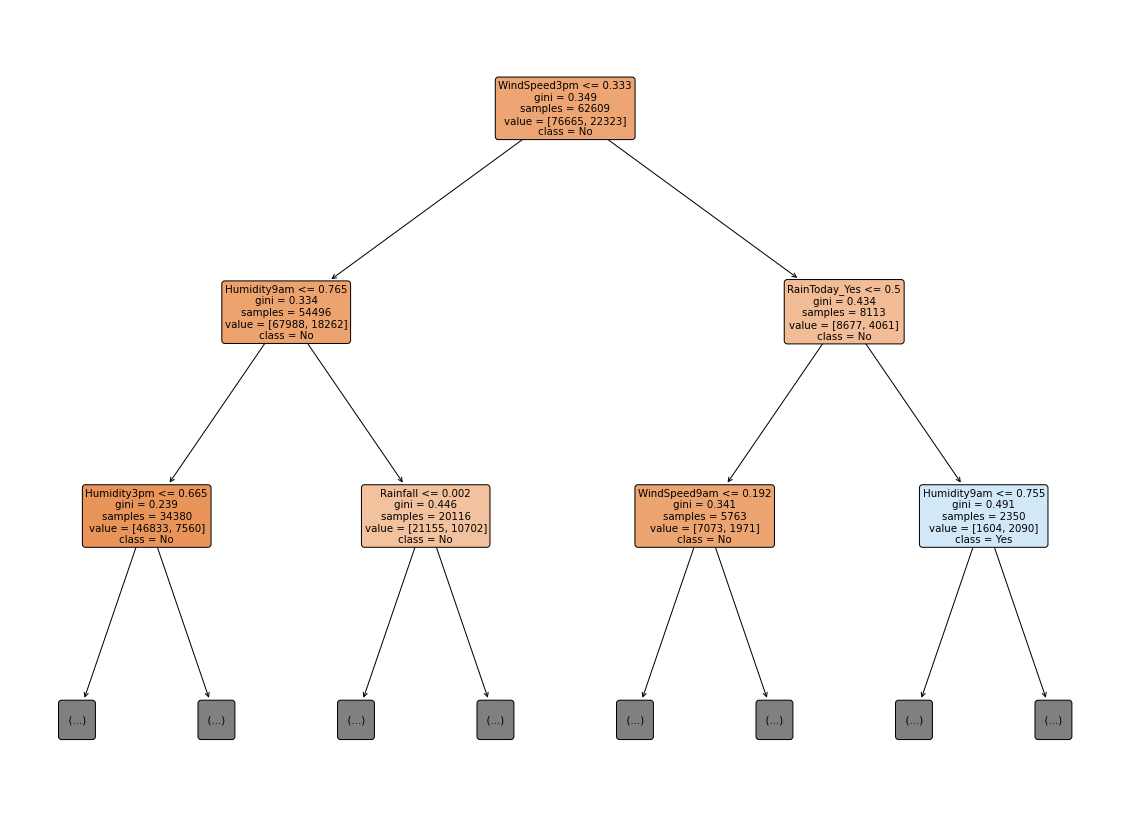

In [117]:
plt.figure(figsize=(20,15))
plot_tree(model.estimators_[0],max_depth=2,feature_names=X_train.columns, filled=True,rounded=True,class_names=model.classes_)

[Text(558.0, 713.475, 'WindDir9am_NNW <= 0.5\ngini = 0.346\nsamples = 62677\nvalue = [76930, 22058]\nclass = No'),
 Text(279.0, 509.625, 'Evaporation <= 0.039\ngini = 0.341\nsamples = 59164\nvalue = [73172, 20363]\nclass = No'),
 Text(139.5, 305.775, 'RainToday_Unknown <= 0.5\ngini = 0.363\nsamples = 44705\nvalue = [53966, 16845]\nclass = No'),
 Text(69.75, 101.92499999999995, '\n  (...)  \n'),
 Text(209.25, 101.92499999999995, '\n  (...)  \n'),
 Text(418.5, 305.775, 'Humidity3pm <= 0.675\ngini = 0.262\nsamples = 14459\nvalue = [19206, 3518]\nclass = No'),
 Text(348.75, 101.92499999999995, '\n  (...)  \n'),
 Text(488.25, 101.92499999999995, '\n  (...)  \n'),
 Text(837.0, 509.625, 'WindSpeed9am <= 0.138\ngini = 0.428\nsamples = 3513\nvalue = [3758, 1695]\nclass = No'),
 Text(697.5, 305.775, 'Cloud3pm <= 0.611\ngini = 0.393\nsamples = 2395\nvalue = [2709, 998]\nclass = No'),
 Text(627.75, 101.92499999999995, '\n  (...)  \n'),
 Text(767.25, 101.92499999999995, '\n  (...)  \n'),
 Text(976.

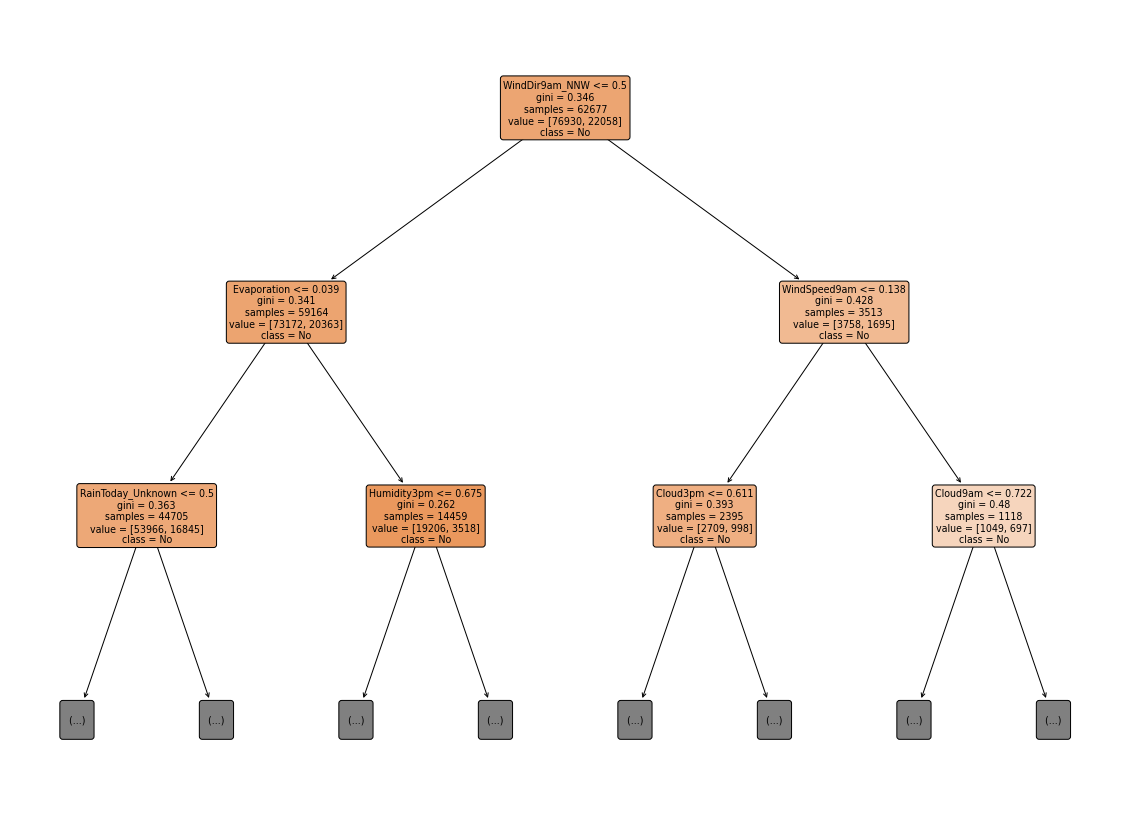

In [118]:
plt.figure(figsize=(20,15))
plot_tree(model.estimators_[15],max_depth=2,feature_names=X_train.columns, filled=True,rounded=True,class_names=model.classes_)

In [119]:
model.feature_importances_

array([0.0422205 , 0.04270362, 0.04876751, 0.02486104, 0.05257983,
       0.04782334, 0.02847088, 0.03089394, 0.05180461, 0.12847142,
       0.04741438, 0.05304539, 0.02407407, 0.03907172, 0.03883451,
       0.04676683, 0.00158452, 0.00173433, 0.00131794, 0.00061886,
       0.00129589, 0.00130245, 0.00119739, 0.00139665, 0.00118427,
       0.00165695, 0.00095237, 0.00191154, 0.00146489, 0.0007405 ,
       0.0012332 , 0.00153606, 0.00035513, 0.00138679, 0.00135677,
       0.00126307, 0.00095776, 0.00089869, 0.0016171 , 0.00132044,
       0.00086018, 0.00054738, 0.00145732, 0.00164438, 0.00135563,
       0.00122328, 0.00096282, 0.00160964, 0.00136372, 0.00192582,
       0.00121731, 0.0015901 , 0.00112186, 0.00184265, 0.00150793,
       0.00076634, 0.00143647, 0.00027453, 0.00121829, 0.00190222,
       0.00141492, 0.00174755, 0.00245848, 0.00168151, 0.00082706,
       0.00221316, 0.00213756, 0.00208239, 0.00342885, 0.00270034,
       0.00264273, 0.00301412, 0.00351408, 0.00312998, 0.00270

In [120]:
importance_df = pd.DataFrame(
    {'feature': X_train.columns,
    'importance':model.feature_importances_}
).sort_values('importance',ascending=False)

In [121]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.128471
11,Pressure3pm,0.053045
4,Sunshine,0.052580
8,Humidity9am,0.051805
2,Rainfall,0.048768
5,WindGustSpeed,0.047823
10,Pressure9am,0.047414
15,Temp3pm,0.046767
1,MaxTemp,0.042704
0,MinTemp,0.042221


In [122]:
import plotly.express as px

In [123]:
px.histogram(importance_df.head(10),x='importance',y='feature')

In [124]:
base_model = RandomForestClassifier(n_jobs=-1,random_state=42).fit(X_train,train_targets)

In [125]:
base_train_acc = base_model.score(X_train,train_targets)
base_train_acc

0.9999595910615429

In [126]:
base_val_acc = base_model.score(X_val,val_targets)
base_val_acc

0.8559572862863444

# greater the randomness lesser the overfitting

In [127]:
model = RandomForestClassifier(n_jobs=-1,n_estimators=10,random_state=42).fit(X_train,train_targets)

In [128]:
model.score(X_train,train_targets)

0.9873520022629005

In [129]:
model.score(X_val,val_targets)

0.8441761940688295

In [130]:
model = RandomForestClassifier(n_jobs=-1,n_estimators=200,random_state=42).fit(X_train,train_targets)

In [131]:
print(model.score(X_train,train_targets))
print(model.score(X_val,val_targets))

0.9999797955307714
0.8561894260344728


In [132]:
def test_params(**params):
    model = RandomForestClassifier(n_jobs=-1,random_state=42,**params).fit(X_train,train_targets)
    return (model.score(X_train,train_targets)), (model.score(X_val,val_targets))

In [133]:
test_params(max_depth=5)

(0.821847092576878, 0.8262433985259126)

In [134]:
test_params(max_depth=25)

(0.9769163939063321, 0.856363530845569)

In [135]:
test_params(max_leaf_nodes=2**5)

(0.8307572635066877, 0.8324531367883465)

In [136]:
test_params(max_leaf_nodes=2**20)

(0.9999494888269285, 0.8565376356566653)

In [137]:
test_params(max_features='log2')

(0.9999595910615429, 0.8540421333642852)

In [138]:
test_params(max_features=3)

(0.9999595910615429, 0.8528814346236434)

In [139]:
test_params(max_features=6)

(0.9999595910615429, 0.8540421333642852)

In [140]:
test_params(max_features=20)

(0.9999494888269285, 0.8575242295862109)

In [141]:
test_params(max_features=40)

(0.9999595910615429, 0.8568278103418258)

# min-sample-split, min-sample-leaf

In [142]:
test_params(min_samples_split=5, min_samples_leaf=2)

(0.9578231704853114, 0.8554930067900877)

In [143]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8501131450276801, 0.8455109976205676)

# min-impurity-decrease

In [144]:
test_params(min_impurity_decrease= 1e-7)

(0.9996363195538853, 0.8558992513493123)

In [145]:
test_params(min_impurity_decrease= 1e-2)

(0.774891906089627, 0.7882885497069235)

In [146]:
test_params(min_impurity_decrease= 1e-6)

(0.9883420212551016, 0.8568858452788579)

# bootstrap,max_samples

In [147]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8558992513493123)

In [148]:
test_params(max_samples=0.9)

(0.9997575463692568, 0.8565956705936975)

# class weight

In [149]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [150]:
test_params(class_weight='balanced')

(0.9999494888269285, 0.8556671116011839)

In [151]:
test_params(class_weight={'No':1,'Yes':2})

(0.9999292843576999, 0.8565376356566653)

# putting it all together

In [152]:
model = RandomForestClassifier(n_jobs=-1,
                               random_state=42,
                               n_estimators=500,
                               max_features=7,
                               max_depth=30,
                               class_weight={'No':1,'Yes':1.5})

In [153]:
model.fit(X_train,train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [154]:
model.score(X_train,train_targets)

0.9920293368893199

In [155]:
model.score(X_val,val_targets)

0.8561894260344728

In [157]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/krish-vadhani/random-forest-classifier


'https://jovian.ai/krish-vadhani/random-forest-classifier'